In [8]:
from typing import TypedDict, Literal, Optional

from langgraph.graph import StateGraph, START, END

In [ ]:
class HRRecruitingState(TypedDict):
    position: str
    jd: Optional[str]
    jd_approved: Optional[bool]
    jd_suggestions: Optional[str]
    job_posted: Optional[bool]
    resume_reviewed: Optional[bool]
    application_threshhold: Optional[int]
    current_number_of_application: Optional[int]
    offer_letter: Optional[str]
    offer_letter_specifications: Optional[str]
    offer_letter_approved: Optional[bool]
    offer_sent: Optional[bool]
    status: Optional[Literal[
        "received_position", "jd_created", "jd_approved", "job_posted", "resume_reviewed", "offer_sent"
    ]]

In [55]:
# Dummy functions for each step
def get_position(state):
    print(f"Received position: {state['position']}")
    return state

def make_jd(state):
    suggestion = state.get('jd_suggestions', '')
    state['jd'] = f"Job Description for {state['position']}. {suggestion}"
    print(f"Generated JD: {state['jd']}")
    return state

def approve_jd(state):
    # Dummy approval logic (simulate user input)
    state['jd_approved'] = True  # Change to True to simulate approval
    return state['jd_approved']


def jd_suggestions(state):
    # Dummy suggestion logic
    state['jd_suggestions'] = "Include experience with Python and AI."
    print(f"JD suggestions: {state['jd_suggestions']}")
    return state


def post_job(state):
    state['job_posted'] = True
    print(f"Posted job for: {state['position']}")
    return state

def check_application_threshold(state):
    # Dummy logic to check if application threshold is met
    state['application_threshhold'] = 5  # Assume we need at least 5 applications
    print(f"Application threshold set to: {state['application_threshhold']}")
    return True

def tweak_job_post(state):
    state['jd'] += " (Tweaked based on feedback)"
    print(f"Tweaked JD: {state['jd']}")
    return state


def review_resume(state):
    state['resume_reviewed'] = True
    print("Reviewed resumes.")
    return state

def candidate_selection(state):
    print("Selected candidates for interview.")
    return True

def schedule_interview(state):
    print("Scheduled interviews.")
    return state

def ask_for_offer_letter_specifications(state):
    # Dummy logic to get offer letter specifications
    state['offer_letter_specifications'] = "Standard offer letter with salary details."
    print(f"Offer letter specifications: {state['offer_letter_specifications']}")
    return state

def create_offer_letter(state):
    state['offer_letter'] = f"Offer letter for position {state['position']}."
    print(f"Created offer letter: {state['offer_letter']}")
    return state

def approve_offer_letter(state):
    state['offer_letter_approved'] = True  # Simulate approval
    print(f"Offer letter approved: {state['offer_letter_approved']}")
    return state['offer_letter_approved']

def send_offer(state):
    state['offer_sent'] = True
    print("Sent offer letter.")
    return state



In [58]:
# Build the graph
graphBuilder = StateGraph(HRRecruitingState)

graphBuilder.add_node("get_position", get_position)
graphBuilder.add_node("make_jd", make_jd)
graphBuilder.add_node("approve_jd", approve_jd)
graphBuilder.add_node("jd_suggestions", jd_suggestions)
graphBuilder.add_node("post_job", post_job)
graphBuilder.add_node("tweak_job_post", tweak_job_post)
graphBuilder.add_node("review_resume", review_resume)
graphBuilder.add_node("schedule_interview", schedule_interview)
graphBuilder.add_node("candidate_selection", candidate_selection)
graphBuilder.add_node("ask_for_offer_letter_specifications", ask_for_offer_letter_specifications)
graphBuilder.add_node("create_offer_letter", create_offer_letter)
graphBuilder.add_node("approve_offer_letter", approve_offer_letter)
graphBuilder.add_node("send_offer", send_offer)
graphBuilder.add_node("check_application_threshold", check_application_threshold)  

graphBuilder.add_edge(START, "get_position")

graphBuilder.add_edge("get_position", "make_jd")
graphBuilder.add_edge("make_jd", "approve_jd")
graphBuilder.add_conditional_edges("approve_jd",
    approve_jd,
    {
    True: "post_job",
    False: "jd_suggestions"
    }
)
graphBuilder.add_edge("jd_suggestions", "make_jd")
graphBuilder.add_edge("approve_jd", "post_job")
graphBuilder.add_edge("post_job", "check_application_threshold")
graphBuilder.add_conditional_edges(
    "check_application_threshold",
    check_application_threshold,
    {
        True: "review_resume",
        False: "tweak_job_post"  # Loop back to post_job if threshold not met
    }
)
graphBuilder.add_edge("tweak_job_post", "post_job")   
# # graphBuilder.add_edge("make_jd", "post_job")
# graphBuilder.add_edge("post_job", "review_resume")
graphBuilder.add_edge("review_resume", "schedule_interview")
graphBuilder.add_edge("schedule_interview", "candidate_selection")
graphBuilder.add_conditional_edges(
    "candidate_selection",
    candidate_selection,
    {
        True: "ask_for_offer_letter_specifications",
        False: END,
    }
)
graphBuilder.add_edge("ask_for_offer_letter_specifications", "create_offer_letter")
graphBuilder.add_edge("create_offer_letter", "approve_offer_letter")
graphBuilder.add_conditional_edges( 
    "approve_offer_letter",
    approve_offer_letter,
    {
        True: "send_offer",
        False: "ask_for_offer_letter_specifications",
    }
)

graphBuilder.add_edge("send_offer", END)

graph = graphBuilder.compile()


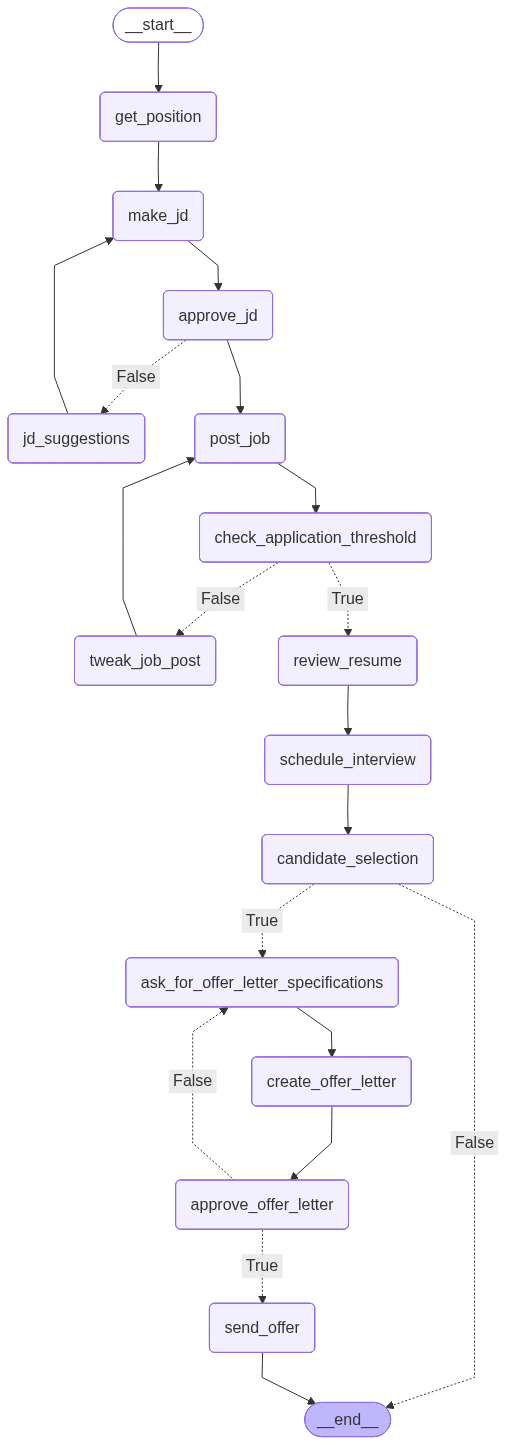

In [59]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))